In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

### Prepare the Data

In [5]:
# Import the StandardScaler module
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data 
df_normalized = df_market_data.copy()  
numeric_cols = df_normalized.select_dtypes(include='number').columns  
df_normalized[numeric_cols] = scaler.fit_transform(df_normalized[numeric_cols])


df_normalized.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [6]:
# Create a DataFrame with the scaled data
df_scaled = df_normalized.copy()  

# Copy the crypto names from the original data
crypto_names = df_market_data.index
# Set the coin_id column as the index
df_scaled.index.name = 'coin_id'


df_scaled.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [8]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# list to store the inertia values
inertia_values = []

#loop to compute the inertia with values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)  
    kmeans.fit(df_scaled)  
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)


inertia_values





  



C:\Users\User\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on 

[287.0,
 198.57181809798124,
 123.19048183836958,
 79.02243535120975,
 65.302379141625,
 52.10180599356482,
 46.03525005555019,
 37.28480659404661,
 32.16141710107242,
 28.075252677898874,
 23.890044355377952]

In [9]:
import pandas as pd

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}


df_elbow = pd.DataFrame(elbow_data)


df_elbow


,k_values,inertia_values
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.101806
6,7,46.035250
7,8,37.284807
8,9,32.161417
9,10,28.075253


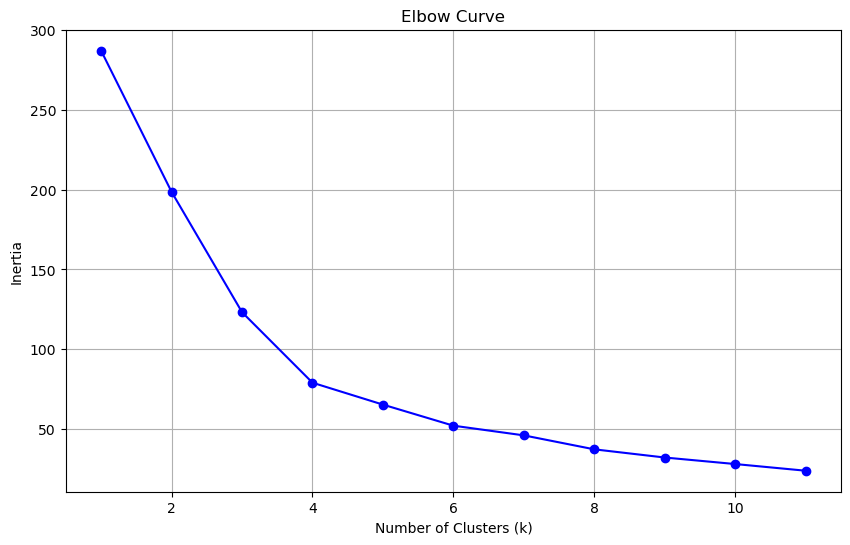

In [10]:
import matplotlib.pyplot as plt

# Plot a line chart with the inertia values
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
from sklearn.cluster import KMeans

# Initialize the K-Means model with the best value for k
best_k = 4  
kmeans_model = KMeans(n_clusters=best_k, random_state=0)


kmeans_model.fit(df_scaled) 

C:\Users\User\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [12]:
# Predict the clusters using the scaled data
cluster_labels = kmeans_model.predict(df_scaled)


print(cluster_labels)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [13]:
# Create a copy of the DataFrame
df_copy = df_scaled.copy()


In [14]:
import hvplot.pandas as hv

# Add a new column to the DataFrame with the predicted clusters
df_copy['predicted_cluster'] = cluster_labels



# Create a scatter plot
scatter_plot = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_cluster",
    cmap="viridis",
    hover_cols=["Name"],
    title="Cryptocurrency Clusters"
)


scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster)

### Optimize Clusters with Principal Component Analysis.

In [15]:
# Import PCA from scikit-learn
from sklearn.decomposition import PCA

# PCA model  with n_components=3
pca_model = PCA(n_components=3)


In [16]:
# PCA model with `fit_transform` to reduce to three PCA's
pca_components = pca_model.fit_transform(df_scaled)

# DataFrame from the PCA components
df_pca = pd.DataFrame(data=pca_components, columns=["PC1", "PC2", "PC3"], index=df_scaled.index)


df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [17]:
# Retrieve the explained variance for each PCA
explained_variance = pca_model.explained_variance_ratio_


df_explained_variance = pd.DataFrame(
    {'Explained Variance': explained_variance},
    index=['PC1', 'PC2', 'PC3']
)


df_explained_variance


,Explained Variance
PC1,0.371986
PC2,0.347008
PC3,0.176038


In [18]:
total_explained_variance = df_explained_variance['Explained Variance'].sum()
print(total_explained_variance)


0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309841

In [19]:
# New DataFrame with the PCA data
df_pca_data = df_pca.copy() 

# Copy the crypto names from the original data
crypto_names = df_market_data.index


df_pca_data.index = crypto_names


df_pca_data.head()



,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [20]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [21]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values = []


for k in k_values:
    
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the KMeans model to the PCA data
    kmeans.fit(df_pca_data)
    
    # Append the model's inertia to the inertia list
    inertia_values.append(kmeans.inertia_)


C:\Users\User\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on 

In [22]:
import pandas as pd

# Dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}


df_elbow = pd.DataFrame(elbow_data)


df_elbow


,k_values,inertia_values
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,27.720626
6,7,21.182776
7,8,17.016962
8,9,13.668325
9,10,10.484890


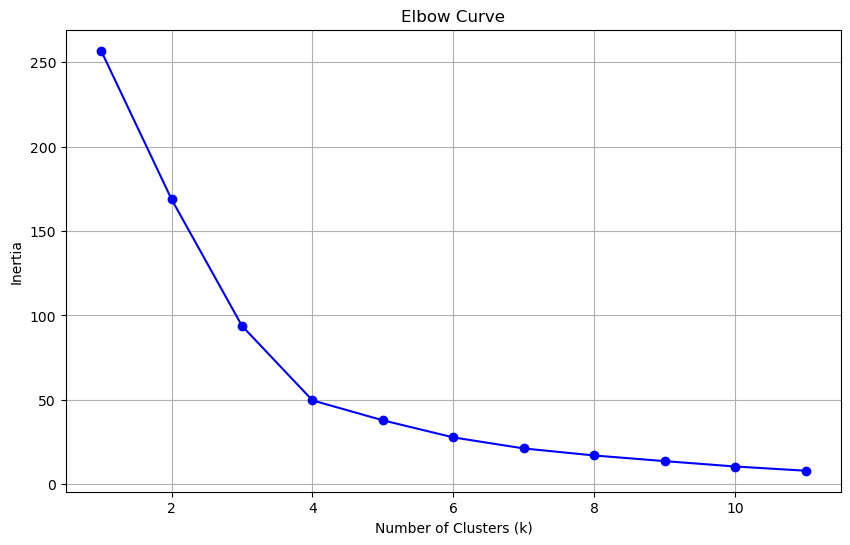

In [23]:
import matplotlib.pyplot as plt

# Plot a line chart with the inertia values
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [24]:
from sklearn.cluster import KMeans

# Initialize the K-Means model using k=4
kmeans_pca = KMeans(n_clusters=4, random_state=0)


In [25]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca_data)


C:\Users\User\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [26]:
# Predict the clusters using the PCA data
pca_clusters = kmeans_pca.predict(df_pca_data)


print(pca_clusters)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [27]:
# Copy of the DataFrame with the PCA data
df_pca_with_clusters = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_with_clusters['Cluster'] = pca_clusters


df_pca_with_clusters.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [28]:
import hvplot.pandas

# Create a scatter plot
scatter_plot = df_pca_with_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Cluster", 
    colormap='viridis',  
    hover_cols=["coin_id"],  
    title="PCA Scatter Plot with K-Means Clusters (PC1 vs PC2)",
    width=800,
    height=500
)

scatter_plot


:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

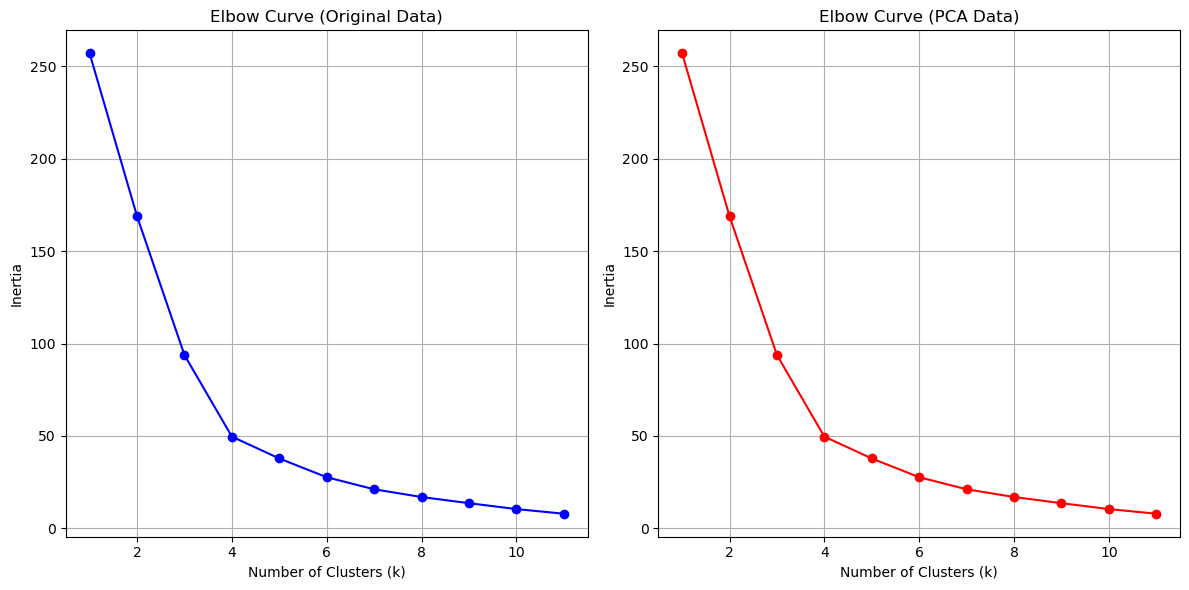

In [29]:
import matplotlib.pyplot as plt

# Create a composite plot to contrast the Elbow curves
plt.figure(figsize=(12, 6))

# Plot the Elbow curve for the original data
plt.subplot(1, 2, 1)
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve (Original Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Plot the Elbow curve for PCA data
plt.subplot(1, 2, 2)
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o', linestyle='-', color='r')
plt.title('Elbow Curve (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.tight_layout()
plt.show()



In [30]:
import hvplot.pandas as hv

# Create a scatter plot for the original data with K-Means clusters
original_data_plot = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_cluster",  
    colormap="viridis",  
    hover_cols=["Name"],  
    title="Original Data Clusters",
    width=800,
    height=500,
)

# Create a scatter plot for the PCA data with K-Means clusters
pca_data_plot = df_pca_with_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Cluster",  
    colormap="viridis",  
    hover_cols=["coin_id"],  
    title="PCA Data Clusters",
    width=800,
    height=500,
)

# Create a composite plot by combining the two scatter plots
composite_plot = original_data_plot + pca_data_plot


composite_plot




:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster)
   .Scatter.II :Scatter   [PC1]   (PC2,Cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features  with K-Means has led to a distinct cluster distribution. i.e easier to identify better. This is because the dimensionality reduction through PCA has made clusters visually separate but  lower density compared to the original data.






